In [2]:

import numpy as np             
import matplotlib.pyplot as plt 
from sklearn.svm import SVR     
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  



In [3]:

np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  
y = np.sin(X).ravel()  
# noise added
y[::5] += 3 * (0.5 - np.random.rand(20))  

In [4]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [5]:
# SVR requires features in similar scale
sc_X = StandardScaler()
sc_y = StandardScaler()

In [6]:
# Fit and transform training data
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()  # y must be 2D for scaling

# Transform test data
X_test_scaled = sc_X.transform(X_test)

Model Initialization and Training

In [7]:
# RBF Kernel
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train_scaled)


SVR(C=100, gamma=0.1)

In [8]:
# Linear Kernel
svr_lin = SVR(kernel='linear', C=100, epsilon=0.1)
svr_lin.fit(X_train_scaled, y_train_scaled)


SVR(C=100, kernel='linear')

In [9]:
# Polynomial Kernel
svr_poly = SVR(kernel='poly', C=100, degree=3, epsilon=0.1)
svr_poly.fit(X_train_scaled, y_train_scaled)

SVR(C=100, kernel='poly')

In [10]:
# Predict test set results
y_pred_rbf_scaled = svr_rbf.predict(X_test_scaled)
y_pred_lin_scaled = svr_lin.predict(X_test_scaled)
y_pred_poly_scaled = svr_poly.predict(X_test_scaled)


In [11]:
# Inverse scaling to get original values
y_pred_rbf = sc_y.inverse_transform(y_pred_rbf_scaled.reshape(-1, 1)).ravel()
y_pred_lin = sc_y.inverse_transform(y_pred_lin_scaled.reshape(-1, 1)).ravel()
y_pred_poly = sc_y.inverse_transform(y_pred_poly_scaled.reshape(-1, 1)).ravel()

In [12]:
# Evaluation 
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

In [13]:
# Print results
print("RBF Kernel SVR Performance:")
print("Mean Squared Error:", mse_rbf)
print("Mean Absolute Error:", mae_rbf)
print("R2 Score:", r2_rbf)

RBF Kernel SVR Performance:
Mean Squared Error: 0.3261448637312595
Mean Absolute Error: 0.3491572998775935
R2 Score: 0.5866795365745999


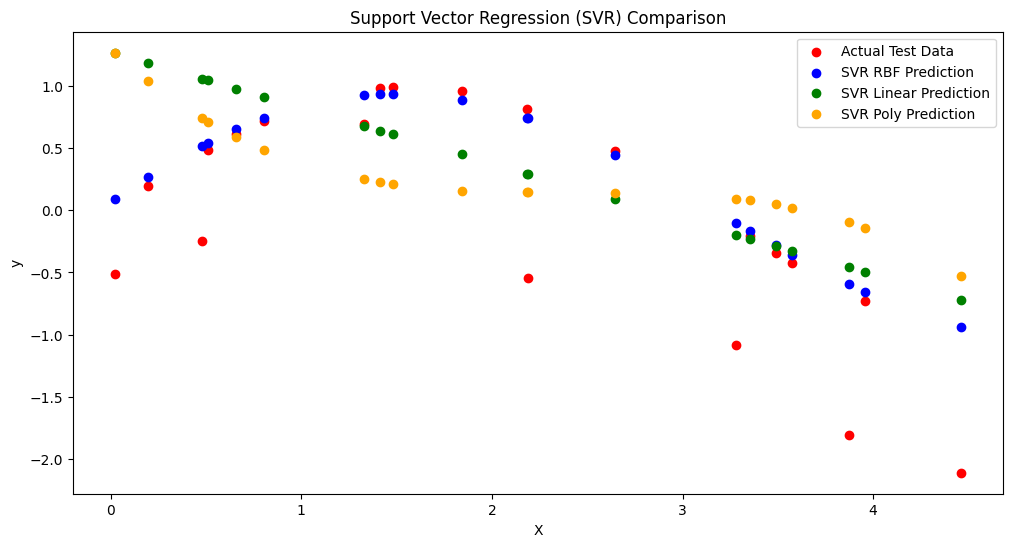

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='red', label='Actual Test Data')
plt.scatter(X_test, y_pred_rbf, color='blue', label='SVR RBF Prediction')
plt.scatter(X_test, y_pred_lin, color='green', label='SVR Linear Prediction')
plt.scatter(X_test, y_pred_poly, color='orange', label='SVR Poly Prediction')
plt.title('Support Vector Regression (SVR) Comparison')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
